In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
salary_df = pd.read_csv("../datasets/Salary_dataset.csv")
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
salary_df.drop("Unnamed: 0", axis=1, inplace=True)
df = salary_df.copy()
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
df.rename(columns={"YearsExperience" : "Exp_in_Years"}, inplace=True)
df.head()

,Exp_in_Years,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [9]:
x = df[["Exp_in_Years"]]
y = df[["Salary"]]

display(x.head(), y.head())

,Exp_in_Years
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

### Scaling Data Values

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
display(x_train[:5], x_test[:5])

array([[-0.29741739],
       [-1.38171623],
       [-0.97043047],
       [ 0.11386837],
       [-0.70870316]])

array([[ 1.79640106],
       [ 0.03908914],
       [ 1.27294644],
       [ 0.1886476 ],
       [-0.59653431]])

### Apply Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [11]:
regression.fit(x_train, y_train)

LinearRegression()

In [12]:
print("Slope or Coefficient :", regression.coef_)
print("Intercept or Constant :", regression.intercept_)

Slope or Coefficient : [[25063.1519945]]
Intercept or Constant : [70417.40909091]


### Best Fit Line for Training Data

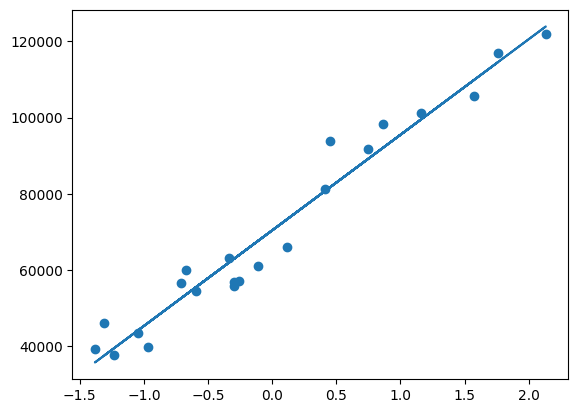

In [13]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))
plt.show()

### Prediction for Test Data
* y = mx + c
* y_pred = 25063.1519945(x_test) + 70417.40909091

In [14]:
y_pred = regression.predict(x_test)
y_pred

array([[115440.88180109],
       [ 71397.10622651],
       [102321.45928951],
       [ 75145.51265839],
       [ 55466.37889103],
       [ 60151.88693088],
       [122000.59305688],
       [107006.96732936]])

### Performance Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)            # rmse = sqrt(mse) = mse**0.5

print(f"Mean Squared Erroor : {mse} \nMean Absolute Error : {mae} \nRoot Mean Squared Error : {rmse}")

Mean Squared Erroor : 38802588.99247059 
Mean Absolute Error : 5056.9954666635895 
Root Mean Squared Error : 6229.172416338352


## R Square
### R^2 = 1-(SSR/SST)
* SSR ---> sum of squares of residuals
* SST ---> Total sum of squares.

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2}")

R2 Score : 0.9347210011126783


## Adjusted R Square
#### Adj R^2 = 1-[(1-R^2)*(n-1) / (n-k-1)]
* n ---> no.of Observations
* k ---> no.of predictor variables

In [17]:
adj_r2 = 1 - ((1-r2)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1))
print(f"Adjusted R2 Score : {adj_r2}")

Adjusted R2 Score : 0.9238411679647913


# Prediction for New Data
* checking salary for 2 years of experience.

In [18]:
y_out = scaler.transform([[2]])
regression.predict(y_out)

C:\Users\saipr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[43284.05798742]])